/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


XEL monthly stock data from 1985-01-01 to 2025-03-01
Total months of data: 483

First 5 rows:
         Date  Open      High       Low     Close    Volume  Dividends  \
0  1985-01-01   0.0  1.624508  1.527038  1.605943   5585200        0.0   
1  1985-02-01   0.0  1.615225  1.559528  1.564169   5135600        0.0   
2  1985-03-01   0.0  1.643074  1.564169  1.624508  17844400        0.0   
3  1985-04-01   0.0  1.731262  1.601301  1.694130   4166400        0.0   
4  1985-05-01   0.0  1.777677  1.656999  1.777677   6849600        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

Last 5 rows:
           Date       Open       High        Low      Close    Volume  \
478  2024-11-01  67.242887  72.777030  64.733669  71.963768  81660900   
479  2024-12-01  71.894342  71.993519  65.527097  66.965179  73699400   
480  2025-01-01  67.282552  67.490833  62.065779  66.647812  73499500   
481  2025-02-01  67.089996  72.389999  65.87000

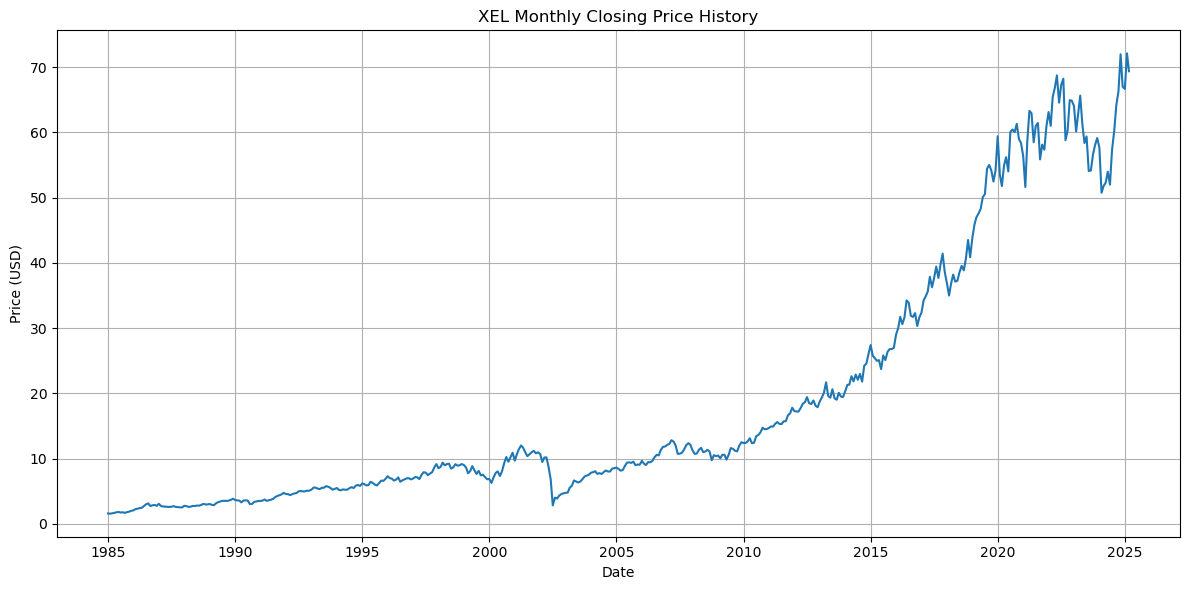

In [1]:
import pandas as pd
import yfinance as tf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the ticker symbol
ticker = "XEL"

# Create a Ticker object
xel = tf.Ticker(ticker)

# Get historical data - max period available (goes back to earliest available data)
# interval = '1mo' for monthly data
historical_data = xel.history(period="max", interval="1mo")

# Reset index to make Date a column
historical_data = historical_data.reset_index()

# Convert the Date column to datetime format if it's not already
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

# Format the date for better readability
historical_data['Date'] = historical_data['Date'].dt.strftime('%Y-%m-%d')

# Display information about the data
print(f"XEL monthly stock data from {historical_data['Date'].min()} to {historical_data['Date'].max()}")
print(f"Total months of data: {len(historical_data)}")
print("\nFirst 5 rows:")
print(historical_data.head())
print("\nLast 5 rows:")
print(historical_data.tail())

# Save to CSV
csv_filename = f"{ticker}_monthly_stock_data.csv"
historical_data.to_csv(csv_filename, index=False)
print(f"\nData saved to {csv_filename}")

# Create a simple plot of the closing prices
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(historical_data['Date']), historical_data['Close'])
plt.title(f'{ticker} Monthly Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plot_filename = f"{ticker}_price_history.png"
plt.savefig(plot_filename)
print(f"Plot saved to {plot_filename}")

# Display the plot if in an interactive environment
plt.show()